<a href="https://colab.research.google.com/github/JaymeManhica/AndroidFlutter/blob/master/C%C3%B3pia_de_meu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



I will Load the California Housing dataset

In [3]:
california= fetch_california_housing()


**Load dataset**

In [4]:
california_housing = fetch_california_housing()

Create a Pandas DataFrame

In [5]:
california = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


**Add a column for median house values ​​(target)**, **ie The "MedHouseValue" column is a crucial column in the "California Housing" dataset. It stores median home values ​​for different census tracts in California. This column serves as the target or label we want to predict in a regression problem.**

In [6]:
california['MedHouseValue'] = california_housing.target

**Show the first rows of the DataFrame**

In [7]:
print(california.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25 

import the KNN algorithm

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
linear_regressor = LinearRegression()

Get descriptive statistics of attributes and target value

method of Pandas DataFrame that calculates various descriptive statistics for each numeric column of the DataFrame. The statistics included are:

count: The number of non-null values ​​in the column. mean: The average of the values ​​in the column. std: The standard deviation of the values ​​in the column. min: The minimum value in the column. 25%: The first quartile, also known as the 25th percentile. 50%: The second quartile, also known as the median or 50th percentile. 75%: The third quartile, also known as the 75th percentile. max: The maximum value in the column. This is useful for gaining a general understanding of the distribution and statistical properties of the data.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print(california.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532       1.153956  
min        0.692308     32.5

Calculate the correlation matrix

The correlation matrix is ​​a table that shows the correlations between pairs of variables in a data set. Correlation is a statistical measure that indicates the relationship between two variables. It ranges from -1 to 1, where:

A value close to 1 indicates a strong positive correlation, that is, when one variable increases, the other also tends to increase.
A value close to -1 indicates a strong negative correlation, that is, when one variable increases, the other tends to decrease.
A value close to 0 indicates a weak correlation, suggesting that the variables have little linear relationship with each other.
The correlation matrix is ​​useful for understanding how variables are related and is often used in exploratory data analysis and feature selection in statistical modeling or machine learning tasks.

In [11]:
correlation_matrix = california.corr()


Plot a correlation matrix heatmap using Seaborn

allowing easy identification of correlation patterns between variables.

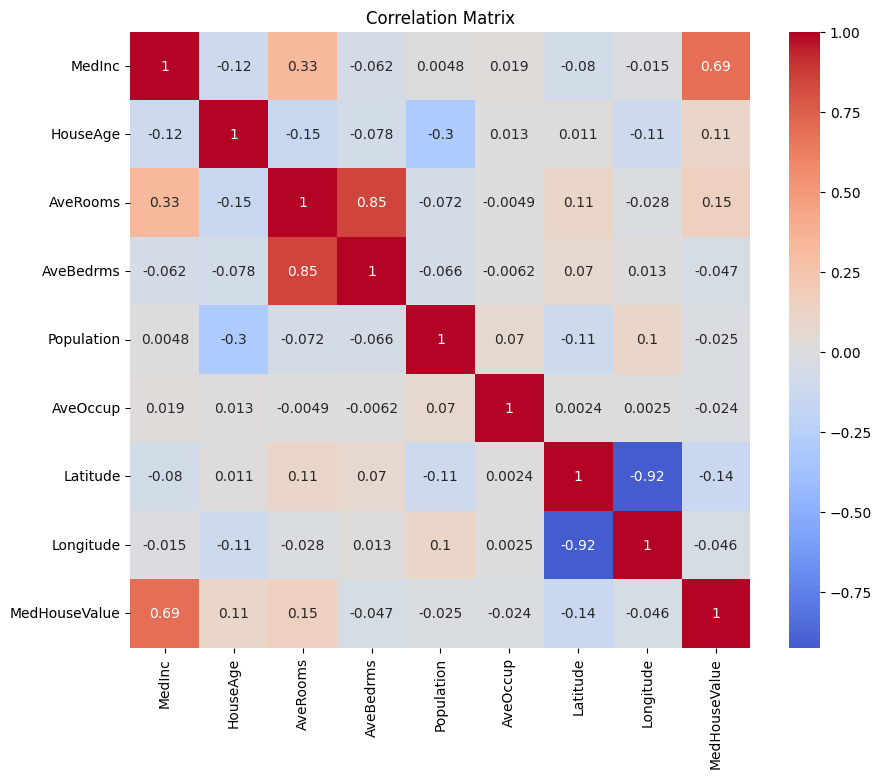

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


Plot attribute and target value histograms

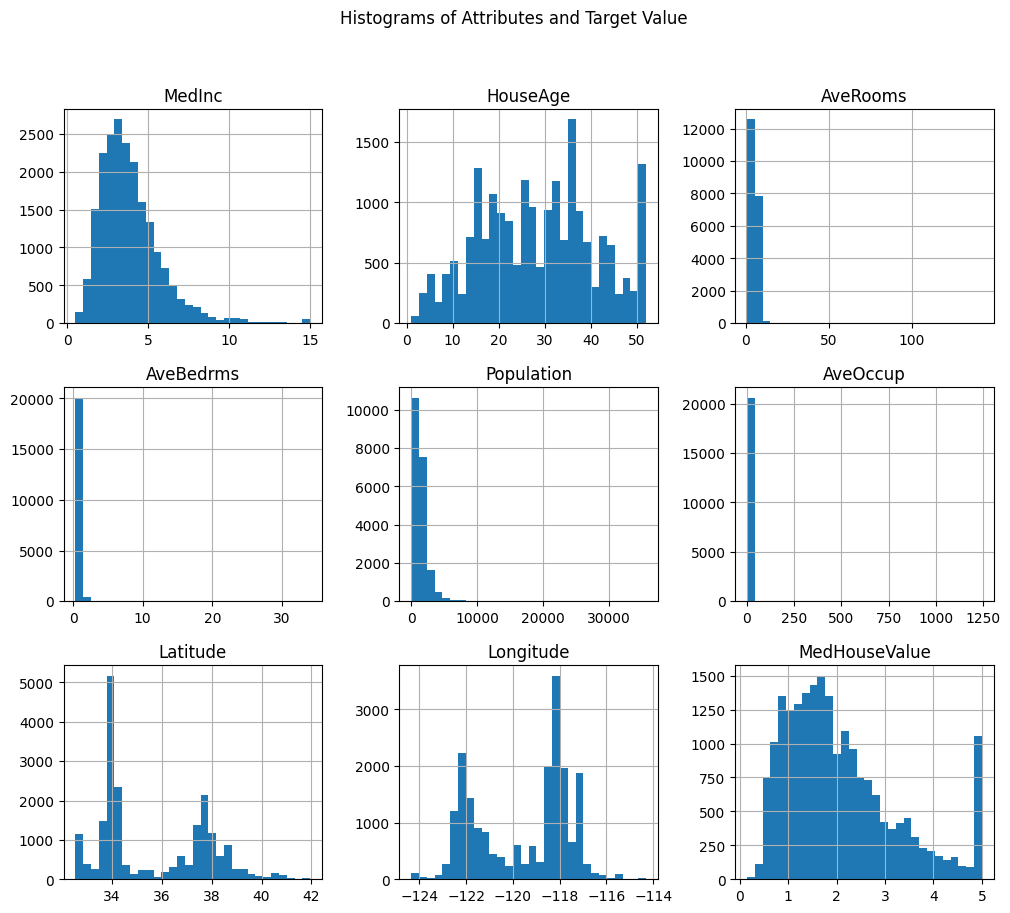

In [13]:
california.hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Attributes and Target Value")
plt.show()

Each point on the graph represents an instance (line) of the data set and is positioned in three dimensions, corresponding to the selected features for the x, y and z axes.
 The color of the points on the graph can be used to encode additional information. In the provided code, the color of the points is defined by the Plotly Express library itself to help visually differentiate the categories.

Thus, the 3D plot provides a visual representation of the relationships between mean income, mean number of bedrooms per household, and mean number of sleeping quarters per household across different instances of the "California Housing" dataset.

In [14]:
import plotly.express as px
from sklearn.datasets import fetch_california_housing

# Carregar o conjunto de dados California Housing
california = fetch_california_housing(as_frame=True)
california_df = california.frame

# Escolher as features para o gráfico 3D
x_axis = 'MedInc'
y_axis = 'AveRooms'
z_axis = 'AveBedrms'

fig = px.scatter_3d(california_df, x=x_axis, y=y_axis, z=z_axis)
fig.show()


geospatial dispersion where the colors of the points are determined by the median value of the houses (MedHouseValue). The warmer the color (red), the higher the median value of homes in that region.

In [15]:
import matplotlib.pyplot as plt

# Plotar um mapa de dispersão geoespacial
plt.figure(figsize=(10, 6))
plt.scatter(california['longitude'], california['latitude'], c=california['MedHouseValue'], cmap='coolwarm', s=10)
plt.colorbar(label='Valor Mediano das Casas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Dispersão Geoespacial com Valor Mediano das Casas')
plt.show()


KeyError: ignored

<Figure size 1000x600 with 0 Axes>

I will present two ways of seeing outliers, with boxpots which is the most used and ideal and another with a dot diagram. let's make observations with a unique combination of identifiable characteristics such as
being remarkably different from the other observations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Selecionar os atributos numéricos para análise de outliers
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Criar subplots para visualizar os box plots dos atributos
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=california[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


no diagrama Diagrama de pontos e box plots verificamos alguns dados isolados. Os investigadores e analistas dos dados têm em mente de que incluir observações
discrepantes na análise distorce os resultados, assim, uma das primeiras opções tem sido
excluir estas observações da análise. Por outro lado, excluir uma ou mais observações
implica reduzir o tamanho da amostra, o que pode ser inadequado para algumas análises,
porque a menores tamanhos da amostra as generalizações dos resultados são menos precisas



Domain Analysis: First, it is important to understand what the outliers represent in the context of California real estate. They can be typos, truly rare information, or they can contain valuable information. Consulting experts in the real estate market can help interpret outliers.

Careful Removal: If the outliers are definitely errors or extremely unlikely values, removal may be an option. However, this must be done with care, as the indiscriminate removal of outliers can affect the representativeness of the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' seja o DataFrame que contém seus dados
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Configuração do layout
num_rows = 2
num_cols = 4
plt.figure(figsize=(15, 10))

# Criação dos diagramas de pontos
for i, feature_x in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    for feature_y in numeric_features:
        if feature_x != feature_y:
            plt.scatter(california[feature_x], california[feature_y], alpha=0.5, label=feature_y)
    plt.xlabel(feature_x)
    plt.ylabel('Valores')
    plt.title(feature_x)
    plt.legend()

# Melhora o layout
plt.tight_layout()

# Exibição dos diagramas de pontos
plt.show()




**Now let's make a prediction with the KNN algorithm**

Make adjustments to the prices (divide by 1000), with the latitude and longitude coordinates, and divide the prices by 1000, so that we reason in terms of 'ks' (thousands), which is easier.



In [ ]:

california['MedHouseValue'] = california['MedHouseValue'] / 1000

# Exibir as primeiras linhas do DataFrame
print(california.head())




Pre-process the data
 Split the dataset into features (X) and target (y)

In [ ]:
california['MedHouseValue'].describe()


It is useful to get intuition about our dataset by viewing it as a heat map, which proves, as expected, that areas of California suffer from higher property prices relative to the rest of England. To reduce noise, we use a color scale to highlight prices ranging from 200k to 1000k so that we don't get the view distorted by cheap or expensive houses (those below 200k and above 1000k, respectively)

In [ ]:

def visualise(california, vmin, vmax):
    california_sorted = california.sort_values(by='MedHouseValue')
    x = california_sorted['Longitude']
    y = california_sorted['Latitude']
    c = california_sorted['MedHouseValue']

    plt.rcParams['figure.figsize'] = [5, 6]
    plt.rcParams['figure.dpi'] = 100

    plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r',
                norm=colors.Normalize(vmin=vmin, vmax=vmax), alpha=0.8)
    plt.colorbar()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Visualization of MedHouseValue by Location')
    plt.show()

visualise(california, 200, 1000)


**Forecast house prices by location**

In [ ]:


# Step 2: Load and explore the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Displaying the first rows of the DataFrame
print(df.head())

# Step 3: Pre-process the data
# Split the dataset into features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Standardize the resources (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Step 7: Make predictions
sample_data = X_test[0].reshape(1, -1)
predicted_price = knn_model.predict(sample_data)
print(f"Predicted Price for Sample Data: ${predicted_price[0]:,.2f}")
